<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/03_Convolutional_Neural_Network_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import pathlib

## Get the data
**Data is available from Food101 dataset available on kaggle which is pre-processed after dowloading**

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-11 04:52:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.207, 142.250.152.207, 142.250.159.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   103MB/s    in 1.0s    

2024-01-11 04:52:40 (103 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Visualize the image data

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [ ]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [ ]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape {img.shape}")
  return img

Image shape (342, 512, 3)


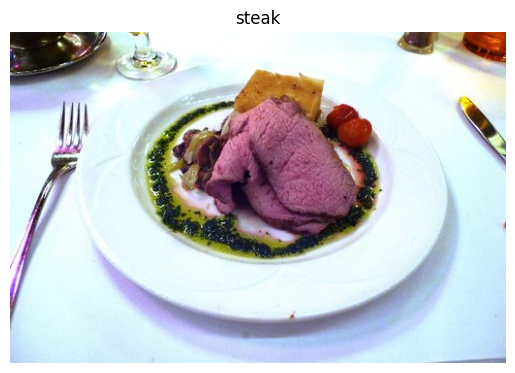

In [ ]:
image = view_random_image("pizza_steak/train/", "steak")

In [ ]:
image.shape

(342, 512, 3)

## Tiny VGG Model
1. Data Preprocessing
2. Create VGG model
3. Compile VGG model
4. Fit VGG model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)

# Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directory and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


# Build a CNN model (Tiny VGG)
vgg_model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])


# Compile the model
vgg_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Fit the model
history_1 = vgg_model_1.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=valid_data,
                            validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 17s 187ms/step - loss: 0.5840 - accuracy: 0.7040 - val_loss: 0.4906 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 7s 155ms/step - loss: 0.4655 - accuracy: 0.7880 - val_loss: 0.4167 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 8s 164ms/step - loss: 0.4100 - accuracy: 0.8233 - val_loss: 0.3440 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3609 - accuracy: 0.8473 - val_loss: 0.3136 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.2980 - accuracy: 0.8860 - val_loss: 0.3187 - val_accuracy: 0.8640


In [ ]:
vgg_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the non CNN model 1

In [ ]:
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(train_data, epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 135ms/step - loss: 0.7708 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 148ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 4)                 602116    
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Using the non CNN model 2
model_2 isn't performing too well so trying to change model a bit to see if it can learn the patterns in the image data

In [ ]:
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


Epoch 1/10
47/47 [==============================] - 10s 148ms/step - loss: 1.0640 - accuracy: 0.6373 - val_loss: 0.5712 - val_accuracy: 0.7640
Epoch 2/10
47/47 [==============================] - 6s 136ms/step - loss: 0.5916 - accuracy: 0.7453 - val_loss: 0.6906 - val_accuracy: 0.5120
Epoch 3/10
47/47 [==============================] - 6s 121ms/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6562 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 7s 145ms/step - loss: 0.6898 - accuracy: 0.5087 - val_loss: 0.6191 - val_accuracy: 0.6600
Epoch 5/10
47/47 [==============================] - 9s 199ms/step - loss: 0.5927 - accuracy: 0.7107 - val_loss: 0.5618 - val_accuracy: 0.7620
Epoch 6/10
47/47 [==============================] - 8s 170ms/step - loss: 0.5694 - accuracy: 0.7373 - val_loss: 0.6286 - val_accuracy: 0.6460
Epoch 7/10
47/47 [==============================] - 7s 143ms/step - loss: 0.5621 - accuracy: 0.7573 - val_loss: 0.5645 - val_accuracy: 0.7760
Epoch

In [ ]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_17 (Dense)            (None, 20)                3010580   
                                                                 
 dense_18 (Dense)            (None, 10)                210       
                                                                 
 dense_19 (Dense)            (None, 5)                 55        
                                                                 
 dense_20 (Dense)            (None, 1)                 6         
                                                                 
Total params: 3010851 (11.49 MB)
Trainable params: 3010851 (11.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## NOTE
1. Convolutional architecture has less number of parameters and still performs better than model_2 and model_3 of dense network

# Binary classification

1. Become one with data
2. Preprocess the data
3. Create a model (start with a baseline)
4. Compile a model
5. Fit the model
6. Evaluate the model
7. Adjust hyperparameter and tweak model
8. Repeat until satisfied

## 1. Become one with data

Image shape (512, 512, 3)
Image shape (512, 384, 3)


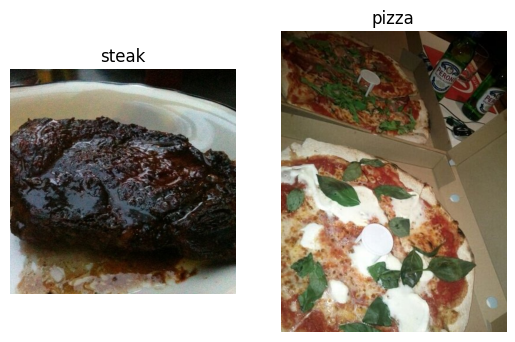

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess the data

In [ ]:
# Standardize and normalize the data